##  ** Cifar 100 Image Classification 

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

/Users/vishalpandey/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
from keras.datasets import cifar100

# Load the entire CIFAR-100 dataset
(x_data, y_data), _ = cifar100.load_data()


In [3]:
# print(x_data)
print(x_data.shape)
print(y_data.shape)
print(x_data[0].shape)

(50000, 32, 32, 3)
(50000, 1)
(32, 32, 3)


In [4]:
# print(x_data[0])
num_samples = x_data.shape[0]
# print(num_samples)
flattened_x_data = x_data.reshape(num_samples, -1)
# print(flattened_x_data)
flattened_x_data.shape

(50000, 3072)

In [5]:
# Assuming x_data is your numpy ndarray with shape (50000, 32, 32, 3)
# Reshape the array to flatten it into 2D
num_samples = x_data.shape[0]
flattened_x_data = x_data.reshape(num_samples, -1)  # Reshape to (50000, 32*32*3)

# Convert numpy ndarray to DataFrame
df = pd.DataFrame(flattened_x_data)

# Display the DataFrame
df.head()


,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,255,255,255,255,255,255,255,255,255,255,...,4,34,36,10,105,133,59,138,173,79
1,255,255,255,253,253,253,253,253,253,253,...,253,253,253,253,253,253,253,255,255,255
2,250,250,248,248,249,243,247,248,239,248,...,190,219,209,194,223,216,207,232,230,228
3,124,194,221,131,202,228,135,206,228,138,...,223,230,237,232,243,237,236,243,230,231
4,43,49,46,32,40,34,87,89,47,127,...,78,93,88,60,55,55,29,63,67,37


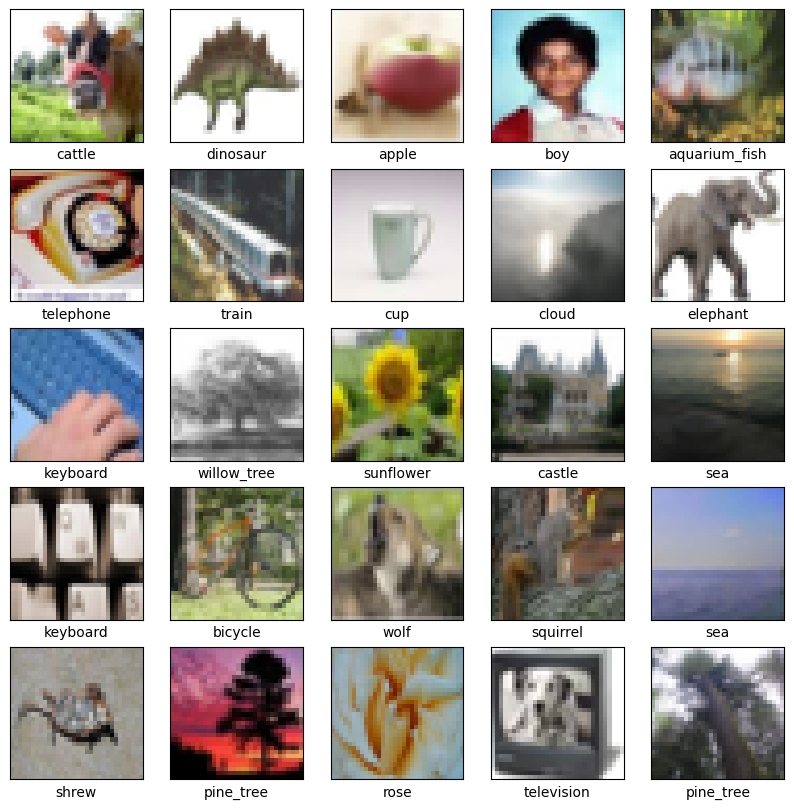

In [6]:
import matplotlib.pyplot as plt
from keras.datasets import cifar100


# Define class labels
class_labels = [
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
    "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
    "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup",
    "dinosaur", "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house",
    "kangaroo", "keyboard", "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man",
    "maple_tree", "motorcycle", "mountain", "mouse", "mushroom", "oak_tree", "orange", "orchid",
    "otter", "palm_tree", "pear", "pickup_truck", "pine_tree", "plain", "plate", "poppy", "porcupine",
    "possum", "rabbit", "raccoon", "ray", "road", "rocket", "rose", "sea", "seal", "shark", "shrew",
    "skunk", "skyscraper", "snail", "snake", "spider", "squirrel", "streetcar", "sunflower", "sweet_pepper",
    "table", "tank", "telephone", "television", "tiger", "tractor", "train", "trout", "tulip", "turtle",
    "wardrobe", "whale", "willow_tree", "wolf"
]

# Display a few sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image = x_data[i]
    plt.imshow(image)
    label_index = y_data[i][0]
    plt.xlabel(class_labels[label_index])
plt.show()

## Data Pre Processing 

In [7]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

## Model Creation 

In [8]:
Image_Classification_Model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(100)
])

## Compiling Model

In [9]:
Image_Classification_Model.compile(optimizer='adam',
                                      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                                      metrics=['accuracy'])

## Train the model

In [10]:
Image_Classification_Model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))


Epoch 1/50
1563/1563 [==============================] - 27s 17ms/step - loss: 3.8457 - accuracy: 0.1120 - val_loss: 3.4115 - val_accuracy: 0.1820
Epoch 2/50
1563/1563 [==============================] - 26s 17ms/step - loss: 3.1634 - accuracy: 0.2243 - val_loss: 3.0036 - val_accuracy: 0.2595
Epoch 3/50
1563/1563 [==============================] - 26s 17ms/step - loss: 2.8395 - accuracy: 0.2891 - val_loss: 2.8229 - val_accuracy: 0.2993
Epoch 4/50
1563/1563 [==============================] - 26s 17ms/step - loss: 2.6252 - accuracy: 0.3324 - val_loss: 2.6581 - val_accuracy: 0.3342
Epoch 5/50
1563/1563 [==============================] - 28s 18ms/step - loss: 2.4586 - accuracy: 0.3674 - val_loss: 2.6387 - val_accuracy: 0.3377
Epoch 6/50
1563/1563 [==============================] - 27s 17ms/step - loss: 2.3333 - accuracy: 0.3934 - val_loss: 2.5174 - val_accuracy: 0.3659
Epoch 7/50
1563/1563 [==============================] - 27s 17ms/step - loss: 2.2278 - accuracy: 0.4168 - val_loss: 2.5528 -

In [11]:
Image_Classification_Model.save('Image_Classification_Model.h5')

/Users/vishalpandey/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
import requests
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing import image

def preprocess_image(img):
    img = img.resize((32, 32))  # Resize the image to match CIFAR-10 dimensions
    img = np.array(img)
    img = img / 255.0  # Normalize pixel values
    return img

In [13]:
model = keras.models.load_model('Image_Classification_Model.h5')

In [14]:
def predict_label_from_url(url):
    img = Image.open(requests.get(url, stream=True).raw)
    input_img = preprocess_image(img)
    input_img = np.expand_dims(input_img, axis=0)
    predictions = model.predict(input_img)
    predicted_label = np.argmax(predictions)
    class_labels = [
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
    "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
    "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup",
    "dinosaur", "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house",
    "kangaroo", "keyboard", "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man",
    "maple_tree", "motorcycle", "mountain", "mouse", "mushroom", "oak_tree", "orange", "orchid",
    "otter", "palm_tree", "pear", "pickup_truck", "pine_tree", "plain", "plate", "poppy", "porcupine",
    "possum", "rabbit", "raccoon", "ray", "road", "rocket", "rose", "sea", "seal", "shark", "shrew",
    "skunk", "skyscraper", "snail", "snake", "spider", "squirrel", "streetcar", "sunflower", "sweet_pepper",
    "table", "tank", "telephone", "television", "tiger", "tractor", "train", "trout", "tulip", "turtle",
    "wardrobe", "whale", "willow_tree", "wolf"
    ]
    predicted_class = class_labels[predicted_label]
    return predicted_class, img

1/1 [==============================] - 0s 15ms/step


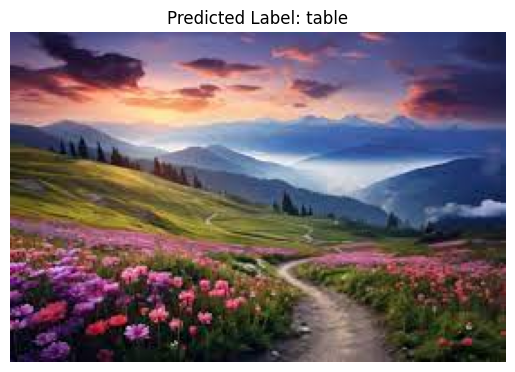

In [21]:
image_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS-l-45V_TfLSdFd8GAk6S6xN6j7WAgxkD2LoGBgOEriGfk5NzLccujOM-HOjhkmpWxh4w&usqp=CAU"
predicted_class, img = predict_label_from_url(image_url)

# Display the input image and predicted label
plt.imshow(img)
plt.title(f'Predicted Label: {predicted_class}')
plt.axis('off')
plt.show()

In [20]:
# image_url = "https://cdn.pixabay.com/photo/2016/09/25/18/29/nissan-1694345_1280.jpg"
# predicted_class, img = predict_label_from_url(image_url)

# # Display the input image and predicted label
# plt.imshow(img)
# plt.title(f'Predicted Label: {predicted_class}')
# plt.axis('off')
# plt.show()

In [17]:
# image_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRKfD2CU2GO310i0xqKnX_yZBAUN_78euHDr7tlyr91FA&s"  # Replace with your image URL
# predicted_class, img = predict_label_from_url(image_url)

# # Display the input image and predicted label
# plt.imshow(img)
# plt.title(f'Predicted Label: {predicted_class}')
# plt.axis('off')
# plt.show()